In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import scipy
from IPython.display import Image

### Q.1.
#### Consider the discrete time periodic signal of period N = 20 as given below:
$$ x[n] =\begin{cases} 
    1 & \text{-2 $\leq$ $n$ $\leq 2$ }\\ 
    0 & \text{otherwise}\\ 
    \end{cases} $$
#### where n is the discrete time sequence
#### (a) Plot the sequence x[n] for 4 time periods
#### (b) Determine and plot the magnitude, $|c_{k}|$ and phase coefficients, ∠$c_{k}$ of discrete time Fourier series (DTFS) of x[n].

##### Discrete Time fourier Series (DTFS) is given by:
$$ x[n] = \sum_{k=0}^{N-1} C_{k}e^{jwn} $$
##### and 
$$ C_{K} = \frac{1}{N} \sum_{n=0}^{N-1} x[n]e^{-jkwn} $$

In [2]:
# Defining the variables

# Time period is 20
q1_N = 20

#No of periods for plotting is 4
q1_TP = 4

# Taking n to be between -10 and 70
q1_n = np.arange(-10,70)

q1_x = np.zeros(q1_N*q1_TP)

q1_temp_n1 = np.where(q1_n==-2)[0][0] # Index of n where n=-2
q1_temp_n2 = np.where(q1_n==2)[0][0]  # Index of n where n=2

#Assigning values 1 to signal for -2<=n<=2 and after a period of 20
for i in range(q1_TP):
    q1_x[q1_temp_n1+i*q1_N:q1_temp_n2+1+i*q1_N] = 1


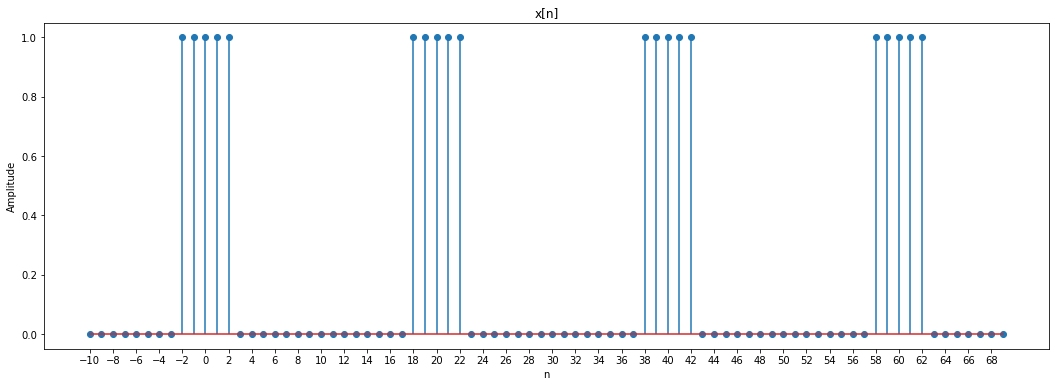

In [3]:
# Plotting the result

plt.figure(figsize=(18,6))
plt.stem(q1_n,q1_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.xticks(np.arange(-10,70,2))
plt.show()

In [4]:
# Function to calculate Discrete Time Fourier Series coefficients as per equation defined above

def DTFS(x,k1,k2):  # x is input signal, k1 is lower limit of coefficients and k2 is upper limit of coefficients
    N = len(x)
    w = 2*np.pi/N
    
    fou_coff = []
    
    for k in range(k1,k2+1):
        temp_sum = 0
        for n in range(N):
            temp_sum = temp_sum + (x[n]*np.exp(-1j*k*w*n))/N
        fou_coff.append(temp_sum)
    
    return np.array(fou_coff)

In [5]:
# Defining the signal for a single Time period

q1_x1 = np.zeros(q1_N)
q1_n1 = np.arange(-10,20)

q1_x1[np.where(q1_n1==-2)[0][0]:np.where(q1_n1==2)[0][0]+1] = 1

# Finding 10 DTFS between k=-5 to k=5
q1_low = -5
q1_up = 4

# Finding DTFS coefficients using function defined above
q1_DTFS = DTFS(q1_x1,k1=q1_low,k2=q1_up)

In [6]:
q1_DTFS

array([ 5.00000000e-02-3.67394040e-17j,  6.93889390e-18-3.46944695e-18j,
       -7.78768258e-02+6.93889390e-18j,  1.61803399e-01-4.85722573e-17j,
       -2.26007351e-01+3.12250226e-17j,  2.50000000e-01+0.00000000e+00j,
       -2.26007351e-01-3.12250226e-17j,  1.61803399e-01+4.85722573e-17j,
       -7.78768258e-02-6.93889390e-18j,  6.93889390e-18+3.46944695e-18j])

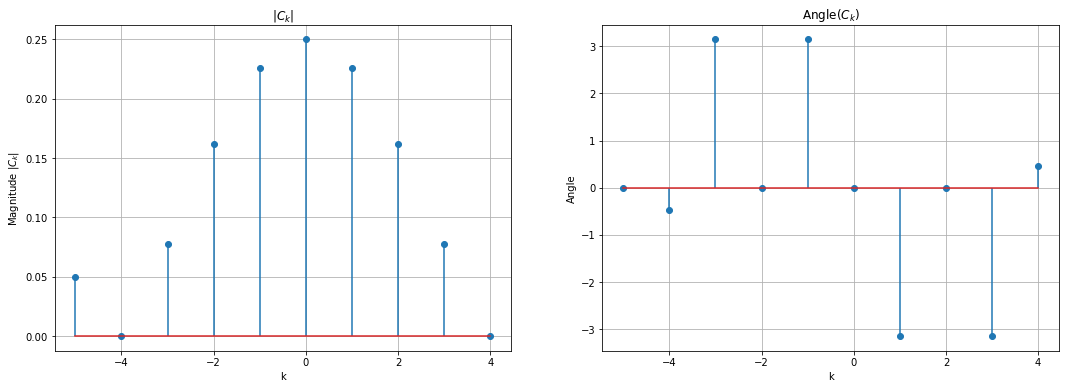

In [7]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.stem(np.arange(q1_low,q1_up+1),abs(q1_DTFS))
plt.xlabel('k')
plt.ylabel('Magnitude |$C_{k}$|')
plt.title('|$C_{k}$|')
plt.grid()

plt.subplot(122)
plt.stem(np.arange(q1_low,q1_up+1),np.angle(q1_DTFS))
plt.xlabel('k')
plt.ylabel('Angle')
plt.title('Angle($C_{k}$)')
plt.grid()
plt.show()

### Q.2.
#### For x[n] in Question 1, the reconstructed signal is given by
$$ \hat x[n] = \sum_{k=-M}^{M} c_{k}e^{jk(2\pi/N)n} $$
#### (a) Reconstruct x[n] from 4 DTFS coefficients (i.e., M = 2) and plot the original signal (x[n]) and the reconstructed signal (ˆx[n]).
#### (b) Reconstruct x[n] from 10 DTFS coefficients (i.e., M = 5) and plot the original signal (x[n]) and the reconstructed signal (ˆx[n]).

In [8]:
# Function to reconstruct the signal using the equation mentioned above

def reconstruct_Fourier(coeff,M,N): # Arguments are DTFS coefficients, number of coefficients, and Time period od signal
    w = 2*np.pi/N
    reconst_x = []
    
    for n in range(N):
        temp_sum = 0
        for k in range(-M,M+1):
            temp_sum = temp_sum + coeff[k+M]*np.exp(1j*k*w*n)
        reconst_x.append(temp_sum)
    
    return np.array(reconst_x)

In [9]:
q2_M1 = 2
q2_M2 = 5

# Generating 4 and 10 Fourier coefficients using function defined in Q1 and taking input sequence as defined in Q1

q2_DTFS_M1 = DTFS(q1_x1,k1=-q2_M1,k2=q2_M1)
q2_DTFS_M2 = DTFS(q1_x1,k1=-q2_M2,k2=q2_M2)

In [10]:
# Reconstructing signal using only DTFS coefficients

q2_reconst_x1 = reconstruct_Fourier(q2_DTFS_M1,q2_M1,20) # For M=2
q2_reconst_x2 = reconstruct_Fourier(q2_DTFS_M2,q2_M2,20) # For M=5

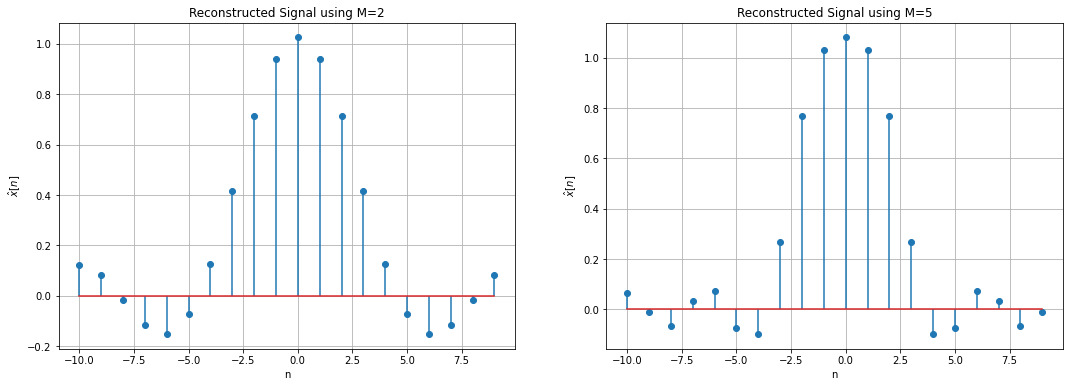

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.stem(np.arange(-10,10),q2_reconst_x1.real)
plt.xlabel('n')
plt.ylabel('$\hatx [n]$')
plt.title('Reconstructed Signal using M=2')
plt.grid()

plt.subplot(122)
plt.stem(np.arange(-10,10),q2_reconst_x2.real)
plt.xlabel('n')
plt.ylabel('$\hatx [n]$')
plt.title('Reconstructed Signal using M=5')
plt.grid()

plt.show()

### Q.3.
#### In the context of discrete time Fourier series, for a discrete time signal x[n], the Parseval’s relation is given by
$$ \frac{1}{N} \sum_{n=<N>} |x[n]|^{2} = \sum_{k=<N>} |c_{k}|^{2}$$
#### (a) If $x[n] = 1+ sin (2πn/N)+3 cos (2πn/N) $(with time period, N = 8), plot x[n] and the magnitude of DTFS coefficients of x[n].
#### (b) Verify the Parseval’s relation for x[n].

In [12]:
# Defining and initilizing the variables

q3_n = np.arange(-20,20)
q3_N = 8

q3_x = 1+np.sin(2*np.pi*q3_n/q3_N) + 3*np.cos(2*np.pi*q3_n/q3_N)

In [13]:
# Calculating 10 Fourier Series Coefficients using function defined in Q1
q3_DTFS = DTFS(q3_x,-5,6)

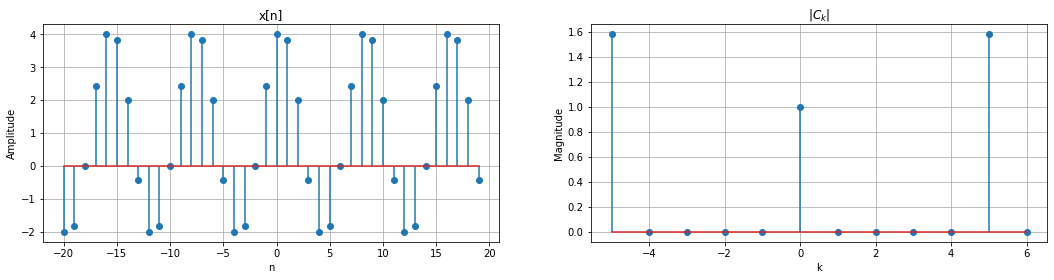

In [14]:
plt.figure(figsize=(18,4))

plt.subplot(121)
plt.stem(q3_n,q3_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.grid()

plt.subplot(122)
plt.stem(np.arange(-5,7),abs(q3_DTFS))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('|$C_{k}$|')
plt.grid()

plt.show()

In [15]:
# Verifying Parseval's theorem

q3_x_sum = np.sum(q3_x[0:q3_N]**2)/q3_N
q3_c_sum = np.sum(abs(q3_DTFS)**2)

In [16]:
print(f'Parseval\'s Theorem:\nSummation of square of x = {q3_x_sum}\nSummation of square of coefficients = {q3_c_sum}')

Parseval's Theorem:
Summation of square of x = 5.9999999999999964
Summation of square of coefficients = 6.000000000000003


### Q.4.
#### Compute the Fourier transform X$(e^{jω}$) of the signal x[n] shown in Fig. 1 and plot its magnitude and phase over the interval ω ∈ [−π, π].
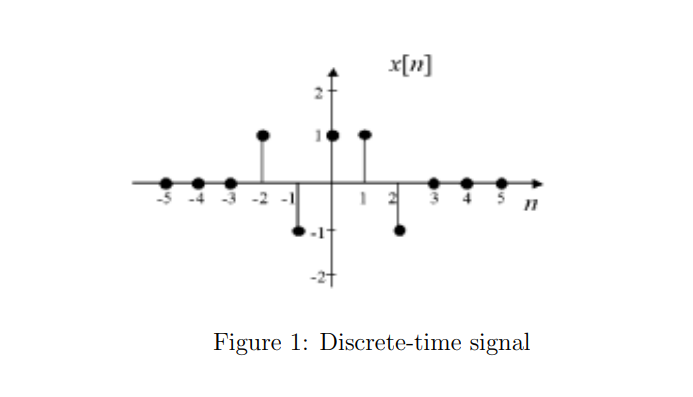

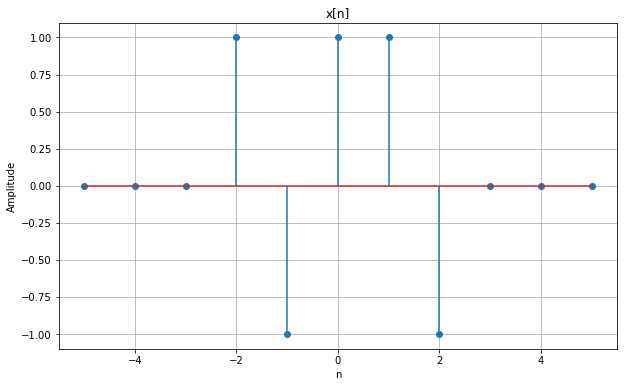

In [17]:
# Defining x[n]
q4_x = np.array([0,0,0,1,-1,1,1,-1,0,0,0])
q4_n = np.arange(-5,6)

plt.figure(figsize=(10,6))
plt.stem(q4_n,q4_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.grid()
plt.show()

##### Fourier Transform of a signal x[n] is given by $X({e^{j\omega})} = \sum_{n=-\infty}^{\infty} x[n]e^{-jwn}$ 

In [18]:
# Function to calculate Discrte Time Fourier Transform using equation above
def Dis_fourier_trans(x,n,omega): # Arguments are input signal, input time and frequency values
    
    x = np.array(x)
    n = np.array(n)
    dis_fourier = []
    
    for i in omega:
        temp = 0
        for k,m in enumerate(n):
            temp = temp + x[k]*np.exp(-1j*i*m)
         
        dis_fourier.append(temp)
    
    dis_fourier = np.array(dis_fourier)
    return dis_fourier,abs(dis_fourier),np.angle(dis_fourier)

In [19]:
# Taking omega to be in between -pi to pi in steps of 0.001
q4_omega = np.linspace(-np.pi,np.pi,1000)

# Calculating DTFT using Function defined above
q4_four_trans = Dis_fourier_trans(q4_x,q4_n,q4_omega)

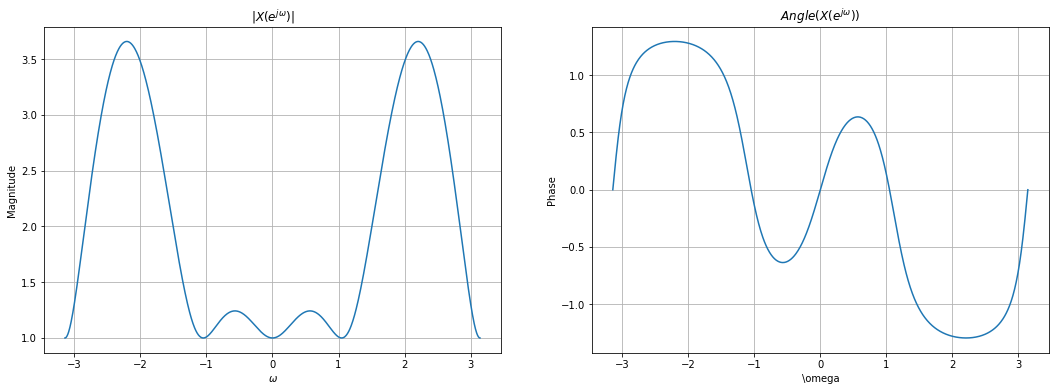

In [20]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q4_omega,q4_four_trans[1])
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.title('$|X(e^{j\omega})|$')
plt.grid()

plt.subplot(122)
plt.plot(q4_omega,q4_four_trans[2])
plt.xlabel('\omega')
plt.ylabel('Phase')
plt.title('$Angle(X(e^{j\omega}))$')
plt.grid()

plt.show()

### Q.5.
#### Given an LTI system with impulse response h[n] = u[n] and an input x[n] = $(0.8)^{n}u[n]$, compute the DTFT of the output $Y(e^{ jω})$ and its inverse DTFT y[n].

In [21]:
# Defining and initiliazing the variables

q5_n = np.arange(-10,20) # Taking n to be in between -10 to 20
q5_h = np.concatenate((np.zeros(10),np.ones(20)))
q5_x = np.zeros(len(q5_n))

for i,n in enumerate(q5_n):
    if n>=0:
        q5_x[i] = np.power(0.8,n)

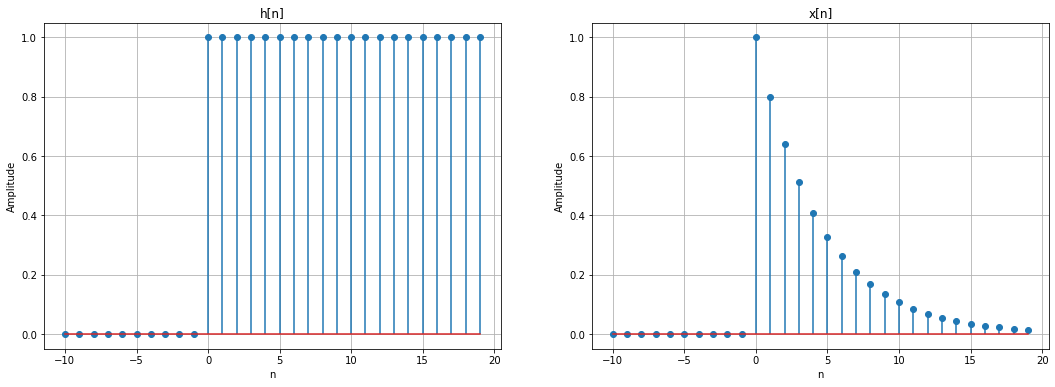

In [22]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.stem(q5_n,q5_h)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('h[n]')
plt.grid()

plt.subplot(122)
plt.stem(q5_n,q5_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.grid()

plt.show()

In [23]:
# Taking omega to in between -pi to pi in steps of 1000
q5_omega = np.linspace(-np.pi,np.pi,1000)

# Calculating DTFT using Function defined in Q4
q5_h_FT = Dis_fourier_trans(q5_h,q5_n,q5_omega)
q5_x_FT = Dis_fourier_trans(q5_x,q5_n,q5_omega)

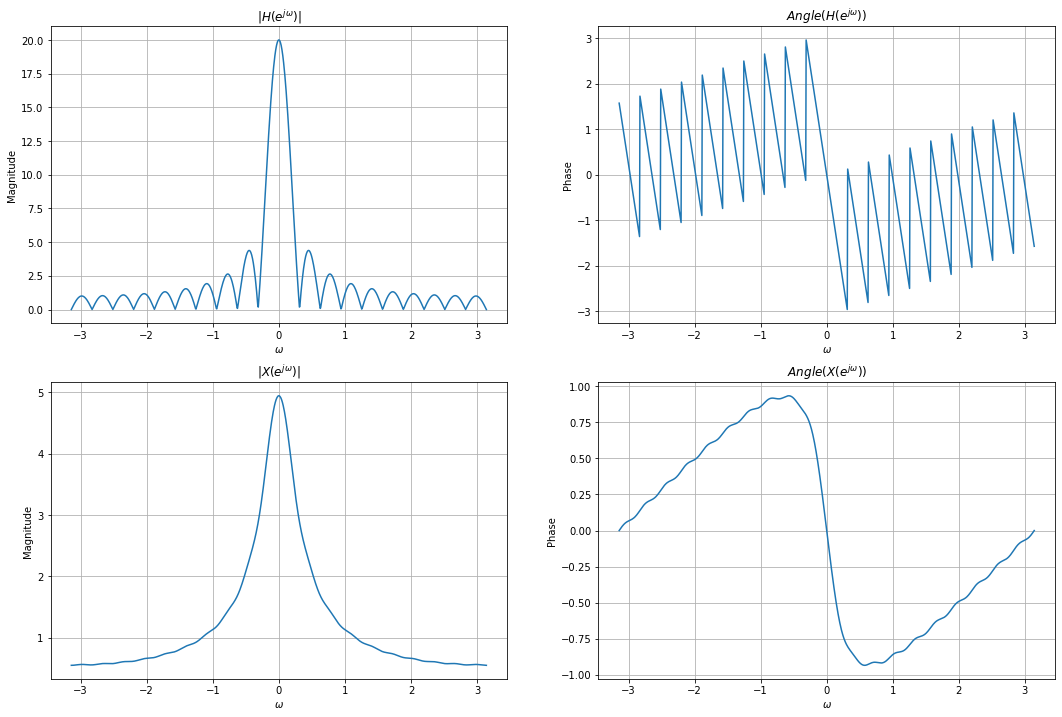

In [24]:
plt.figure(figsize=(18,12))

plt.subplot(221)
plt.plot(q5_omega,q5_h_FT[1])
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.title('$|H(e^{j\omega})|$')
plt.grid()

plt.subplot(222)
plt.plot(q5_omega,q5_h_FT[2])
plt.xlabel('$\omega$')
plt.ylabel('Phase')
plt.title('$Angle(H(e^{j\omega}))$')
plt.grid()

plt.subplot(223)
plt.plot(q5_omega,q5_x_FT[1])
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.title('$|X(e^{j\omega})|$')
plt.grid()

plt.subplot(224)
plt.plot(q5_omega,q5_x_FT[2])
plt.xlabel('$\omega$')
plt.ylabel('Phase')
plt.title('$Angle(X(e^{j\omega}))$')
plt.grid()

plt.show()

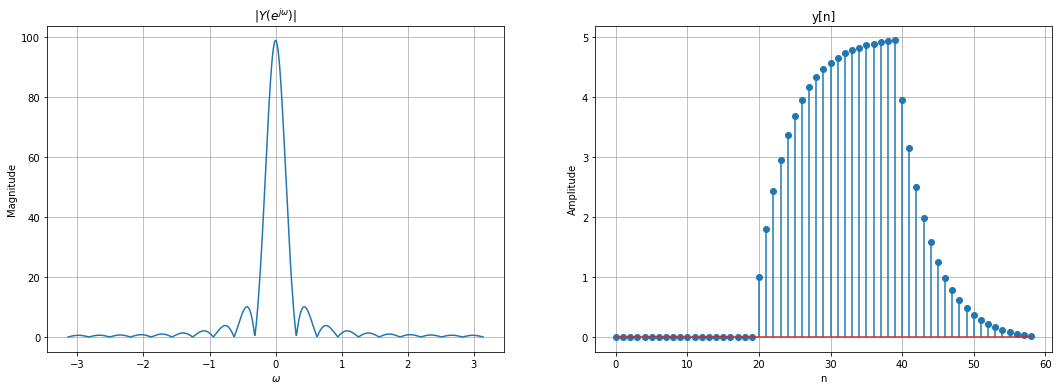

In [25]:
# Finding Y(e^jw) and y[n]

q5_y_FT = np.multiply(q5_h_FT[0],q5_x_FT[0])
q5_y = np.convolve(q5_h,q5_x)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q5_omega,abs(q5_y_FT))
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.title('$|Y(e^{j\omega})|$')
plt.grid()

plt.subplot(122)
plt.stem(q5_y)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('y[n]')
plt.grid()

plt.show()

### Q.6.
#### Use the DFT to compute approximately the first 64 Fourier coefficients of the function
$$ f(t) = e^{-t^{2}/10}[sin2t + 2 cos4t + 0.4sint sin10t]$$
#### on the interval [0, 2π].
#### (a) Plot f(t)
#### (b) Compute the coefficients and plot them. Use the following transformation to compute DFT. Y = Wf

In [26]:
# Defining and initiliazing the variables

q6_n = np.linspace(0,2*np.pi,64)
q6_f = np.exp(-0.1*np.power(q6_n,2))*(np.sin(2*q6_n)+2*np.cos(4*q6_n)+0.4*np.sin(q6_n)*np.sin(10*q6_n))

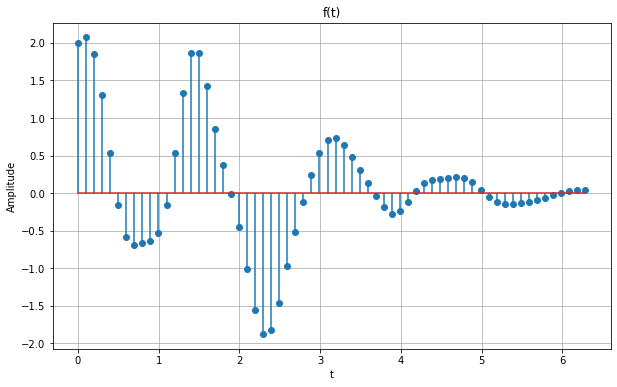

In [27]:
plt.figure(figsize=(10,6))

plt.stem(q6_n,q6_f)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('f(t)')
plt.grid()
plt.show()

In [28]:
# Function to calculate W matrix which takes argument N and return a matrix of size NxN
def trans_mat(N):
        
    temp_mat = np.zeros((N,N),dtype=np.complex64)
    
    for i in range(N):
        for n in range(N):
            temp_mat[i][n] = np.exp(-1j*2*np.pi*i*n/N)
    
    return temp_mat

In [29]:
# Finding W matrix for 64 coefficients
q6_W = trans_mat(64)

# Output is Dot product of W and input signal
q6_Y = np.dot(q6_W,q6_f)

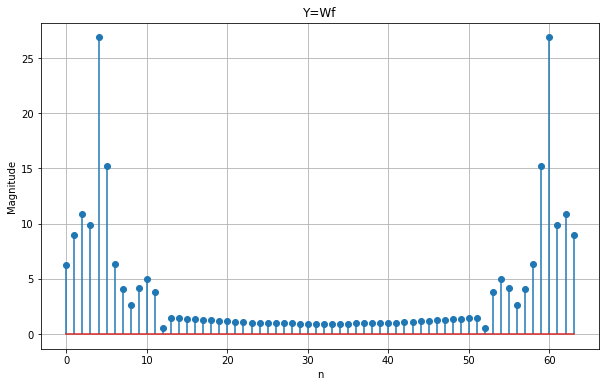

In [30]:
plt.figure(figsize=(10,6))

plt.stem(abs(q6_Y))
plt.xlabel('n')
plt.ylabel('Magnitude')
plt.title('Y=Wf')
plt.grid()
plt.show()

### Q.7.
#### x[n] is a discrete time sequence given by:
$$ x[n] = (\frac{-1}{3})^{n} u[n] - (\frac{1}{2})^{n} u[-n-1]$$
#### where n is the discrete time sequence and u[n] is the unit step sequence.
#### (a) Find the Z-transform of x[n] denoted by X(z) (calculate manually). Plot x[n], the magnitude and phase spectra of X(z) on 3 different subplots. Also, visualize the real and imaginary parts of X(z) on a 3D plot.
#### (b) Find the Region of Convergence (ROC) of X(z) (calculate manually). Plot and visualize the poles, zeros and ROC of X(z) on a single subplot (for plotting ROC, draw circles and shade the appropriate region).

##### Solving Manually, 
(a.) $$ X(z) = \frac{z(12z-1)}{(3z+1)(2z-1)}$$
(b.) The region of convergence is: $$ \frac{1}{3} \leq |z| \leq \frac{1}{2}$$

In [31]:
# Defining variables

q7_n = np.arange(-6,6)
q7_x1 = np.zeros(len(q7_n))
q7_x2 = np.zeros(len(q7_n))
q7_x3 = np.zeros(len(q7_n))

for i,n in enumerate(q7_n):
    if n>=0:
        q7_x1[i] = np.power((-1/3),n)
    
    elif n<=-1:
        q7_x2[i] = np.power(0.5,n)

q7_x3 = q7_x1 - q7_x2

In [32]:
# Taking omega to in between -pi to pi in steps of 1000

q7_omega = np.linspace(-np.pi,np.pi,1000)
q7_z_mag = np.zeros(1000)
q7_z_phase = np.zeros(1000)
q7_z_real = np.zeros(1000)
q7_z_imag = np.zeros(1000)

# Calculating magnitude, phase, real part, imaginary part of X(z)
for i,omega in enumerate(q7_omega):
    z = np.exp(1j*omega)
    q7_X_z = (z*(12*z-1))/((3*z+1)*(2*z-1))
    
    q7_z_mag[i] = abs(q7_X_z)
    q7_z_phase[i] = np.angle(q7_X_z)
    q7_z_real[i] = q7_X_z.real
    q7_z_imag[i] = q7_X_z.imag

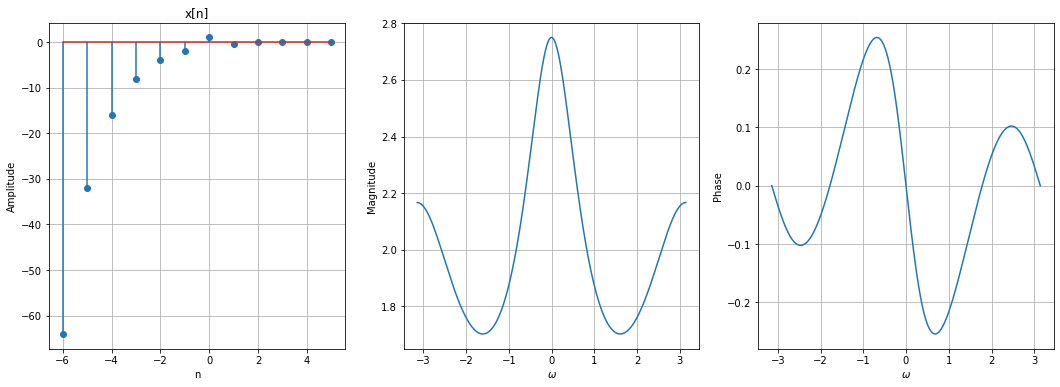

In [33]:
plt.figure(figsize=(18,6))

plt.subplot(131)
plt.stem(q7_n,q7_x3)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.grid()

plt.subplot(132)
plt.plot(q7_omega,q7_z_mag)
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.title('')
plt.grid()

plt.subplot(133)
plt.plot(q7_omega,q7_z_phase)
plt.xlabel('$\omega$')
plt.ylabel('Phase')
plt.title('')
plt.grid()

plt.show()

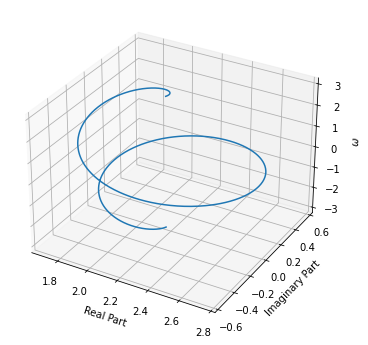

In [34]:
# Plotting 3D plot for real and imaginary part

fig = plt.figure(figsize=(18,6))
ax = plt.axes(projection ='3d')
ax.plot3D(q7_z_real,q7_z_imag,q7_omega)
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_zlabel('$\omega$')
plt.show()

In [35]:
# Defining  poles and zeros
q7_poles = [-1/3,1/2]
q7_zeros = [1/12]

# Defining ROC 
q7_ROC_rad = [1/3,1/2]
q7_temp_y = 0

In [36]:
# Drawing  ROC as annular disc, drawing 2 circles with radius 1/3 and 1/2
q7_theta = np.linspace(0, 2*np.pi,50, endpoint=True)
q7_xs = np.outer(q7_ROC_rad, np.cos(q7_theta))
q7_ys = np.outer(q7_ROC_rad, np.sin(q7_theta))
q7_xs[1,:] = q7_xs[1,::-1]
q7_ys[1,:] = q7_ys[1,::-1]

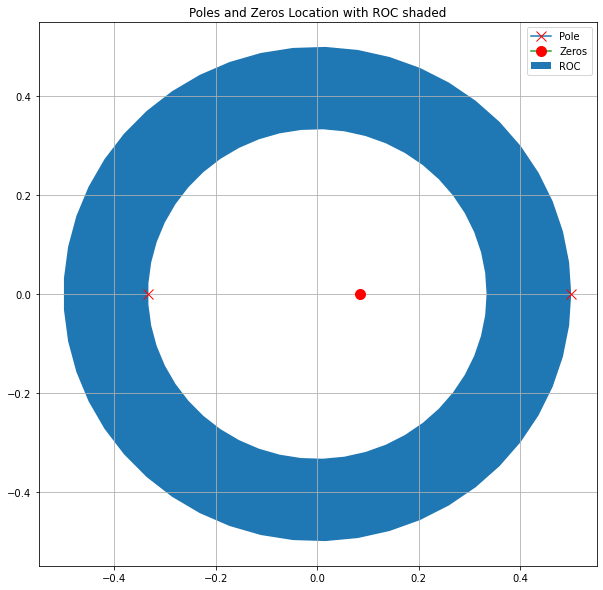

In [37]:
plt.figure(figsize=(10,10))
plt.plot(q7_poles[0],q7_temp_y,marker="x", markersize=10, markeredgecolor="red",label='Pole')
plt.plot(q7_poles[1],q7_temp_y,marker="x", markersize=10, markeredgecolor="red")
plt.plot(q7_zeros,q7_temp_y,marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red",label='Zeros')
plt.fill(np.ravel(q7_xs), np.ravel(q7_ys),label='ROC')
plt.title('Poles and Zeros Location with ROC shaded')
plt.grid()
plt.legend()
plt.show()

### Q.8.
#### For the z-transform, H(z), is given by:
$$ H(z) = \frac{18z^{3}}{18z^{3}+3z^{2}-4z-1}$$
#### (a) Determine and plot the zeros and poles of H(z). Also, plot its magnitude and phase spectra.
#### (b) Using partial fraction expansion, determine the ROC and inverse z-transform of H(z).

In [38]:
# Defining numerator and denominator as polynomials 
q8_num = [18,0,0,0]
q8_den = [18,3,-4,-1]

In [39]:
# Determining poles and zeros of H(z)
q8_poles = np.roots(q8_den)
q8_zeros = np.roots(q8_num)

print(f'The zeros of given Transfer Function is:\n1. {q8_zeros[0]} \n2. {q8_zeros[1]}\n3. {q8_zeros[2]}')
print(f'The poles of given Transfer Function is:\n1. {q8_poles[0]} \n2. {q8_poles[1]}\n3. {q8_poles[2]}')

The zeros of given Transfer Function is:
1. 0.0 
2. 0.0
3. 0.0
The poles of given Transfer Function is:
1. (0.5+0j) 
2. (-0.3333333333333332+2.96942205659939e-09j)
3. (-0.3333333333333332-2.96942205659939e-09j)


In [40]:
# Calculating magnitude and phase of H(z)

q8_omega = np.linspace(-np.pi,np.pi,1000)
q8_z_mag = np.zeros(1000)
q8_z_phase = np.zeros(1000)

for i,omega in enumerate(q8_omega):
    z = np.exp(1j*omega)
    q8_X_z = (18*np.power(z,3))/((18*np.power(z,3)+3*np.power(z,2)-4*z-1))
    
    q8_z_mag[i] = abs(q8_X_z)
    q8_z_phase[i] = np.angle(q8_X_z)

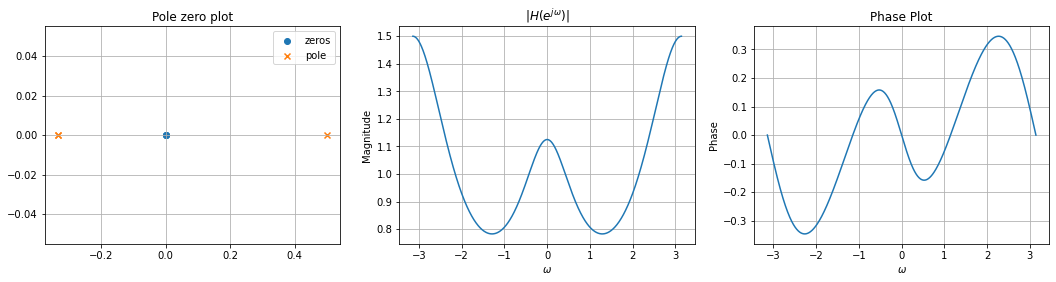

In [41]:
plt.figure(figsize=(18,4))
plt.subplot(131)
plt.scatter(q8_zeros,[0,0,0],marker="o",label='zeros')
plt.scatter(q8_poles.real,[0,0,0],marker="x",label='pole')
plt.title('Pole zero plot')
plt.legend()
plt.grid()

plt.subplot(132)
plt.plot(q8_omega,q8_z_mag)
plt.xlabel('$\omega$')
plt.ylabel('Magnitude')
plt.title('$|H(e^{j\omega})|$')
plt.grid()

plt.subplot(133)
plt.plot(q8_omega,q8_z_phase)
plt.xlabel('$\omega$')
plt.ylabel('Phase')
plt.title('Phase Plot')
plt.grid()

plt.show()

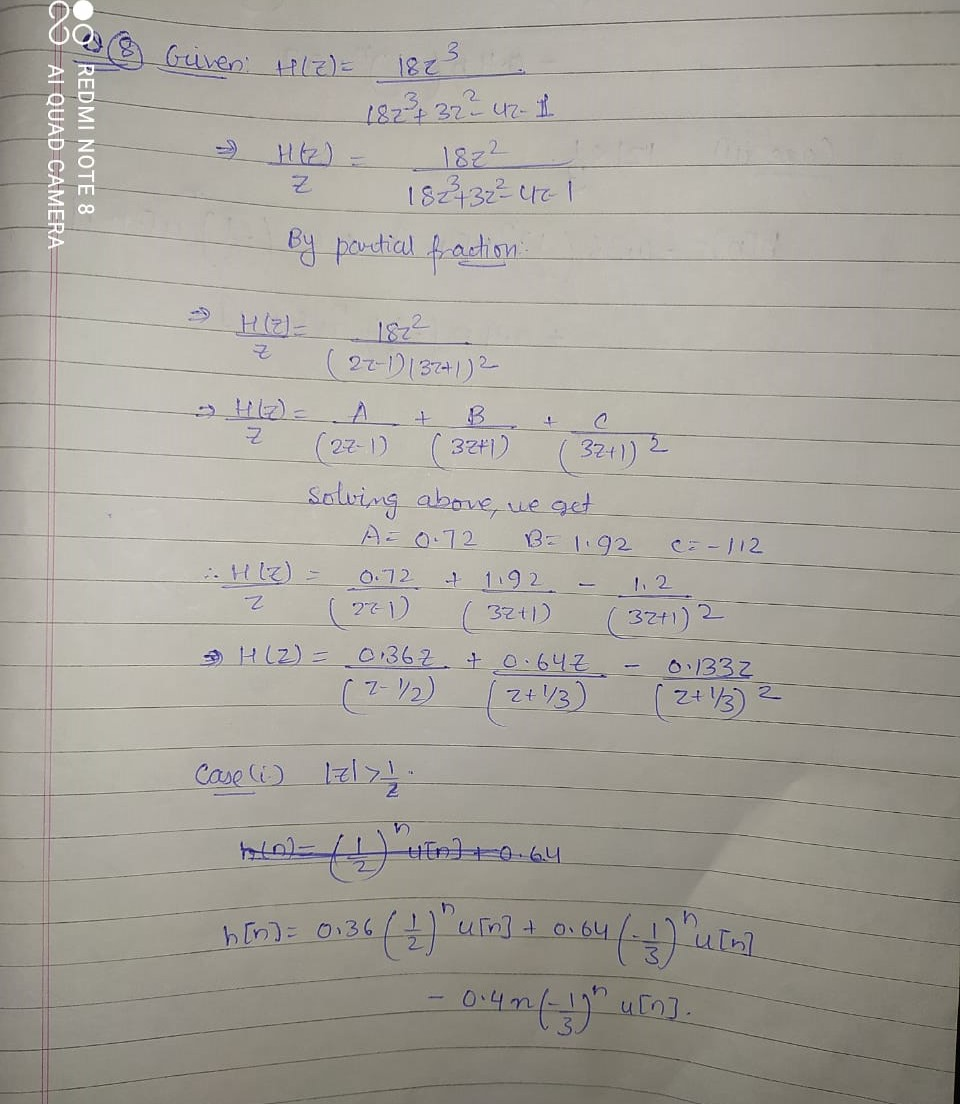

In [42]:
Image(filename='Q8(i).jpeg',width=400, height=200)

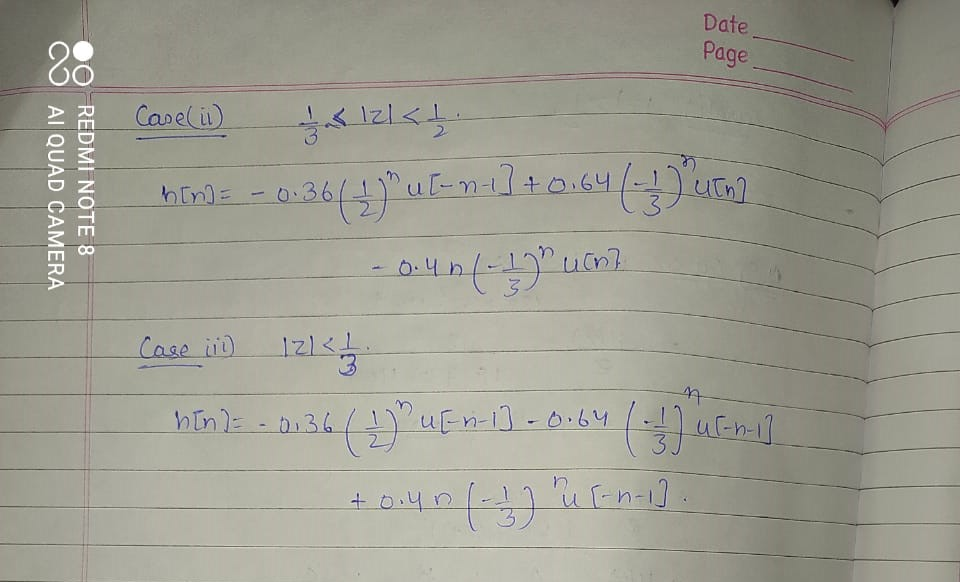

In [43]:
Image(filename='Q8(ii).jpeg',width=400, height=200)

### Q.9.
#### One of the uses of the Laplace transform is the solution of differential equations.
#### (a) Suppose you are given the ordinary differential equation that represents an LTI system,
#### $ y^{(2)}(t) + 0.5y^{(1)}(t) + 0.15y(t) = x(t), t ≥ 0 $
#### where y(t) is the output and x(t) is the input of the system, y (1)(t) and y (2)(t) are first and second order derivatives with respect to t. The input is causal, i.e., x(t) = 0, t < 0. What should be the initial conditions for the system to be LTI? Find Y (s) for those initial conditions.
#### (b) If y (1)(0) = 1 and y(0) = 1 are the initial conditions for the above ordinary differential equation, find Y (s). If the input to the system is doubled, i.e., the input is 2x(t), is Y (s) doubled? Is the system linear?
#### (c) Find the solutions of the ordinary differential equation when the input is u(t) and 2u(t), with the initial conditions as given above. Compare the solutions and verify your response in (b).

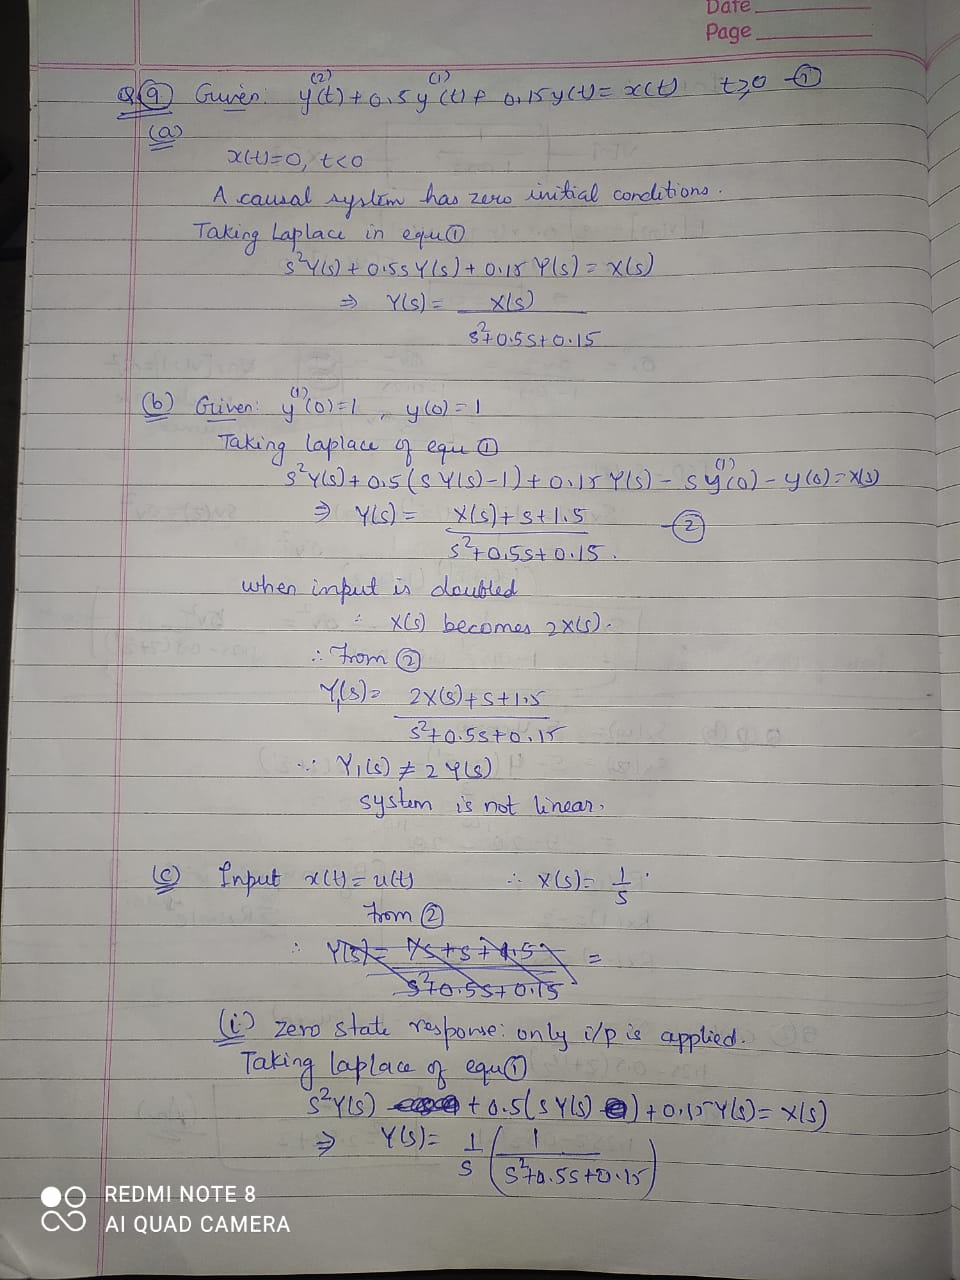

In [44]:
Image(filename='Q9(i).jpeg',width=400, height=200)

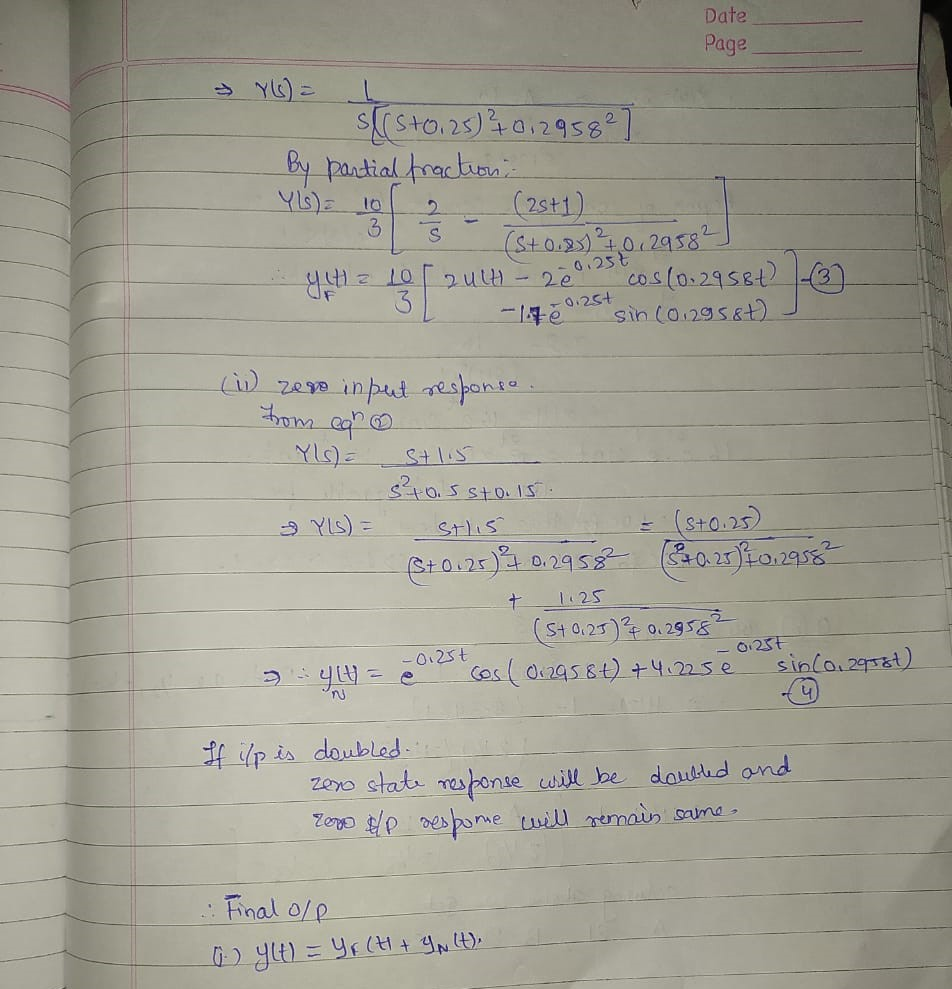

In [45]:
Image(filename='Q9(ii).jpeg',width=400, height=200)

In [46]:
from scipy.integrate import odeint

In [47]:
# Function to return differential equation as per given question

def f(u,t):
    return (u[1],-0.5*u[1]-0.15*u[0]+1)

def g(u,t):
    return (u[1],-0.5*u[1]-0.15*u[0]+2)

q9_y0 = [1,1]
q9_t = np.linspace(0,30,1000)
q9_us1 = odeint(f,q9_y0,q9_t)
q9_ys1 = q9_us1[:,0]

# Solving ODE using odeint function
q9_us2 = odeint(g,q9_y0,q9_t)
q9_ys2 = q9_us2[:,0]


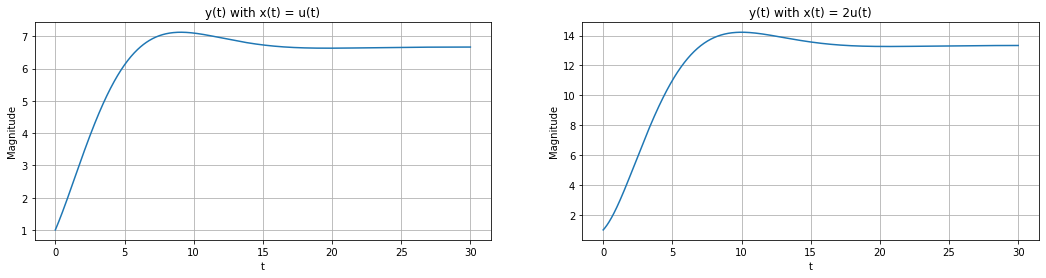

In [48]:
plt.figure(figsize=(18,4))

plt.subplot(121)
plt.plot(q9_t,q9_ys1)
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.title('y(t) with x(t) = u(t)')
plt.grid()

plt.subplot(122)
plt.plot(q9_t,q9_ys2)
plt.xlabel('t')
plt.ylabel('Magnitude')
plt.title('y(t) with x(t) = 2u(t)')
plt.grid()

plt.show()

### Q.10.
#### We are given the following five facts about a real signal x(t) with Laplace transform X(s):
#### • X(s) has exactly two pole
#### • X(s) has no zeros in the finite s-plane.
#### • X(s) has a pole at s = -1 + j.
#### • $e^{2t}x(t) $is not absolutely integrable.
#### • X(0) = 8.
#### Determine X(s) and specify its region of convergence. Also plot its poles.

### Solving Manually
$ X(s) = \frac{16}{s^{2}+2s+2}$
#### ROC is Re(s) > -1 

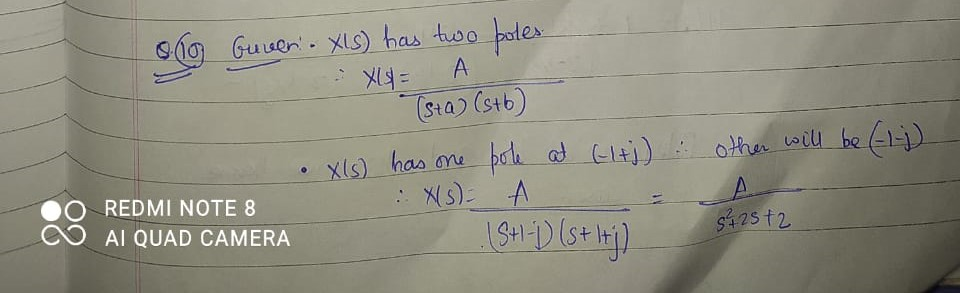

In [49]:
Image(filename='Q10(i).jpeg',width=400, height=200)

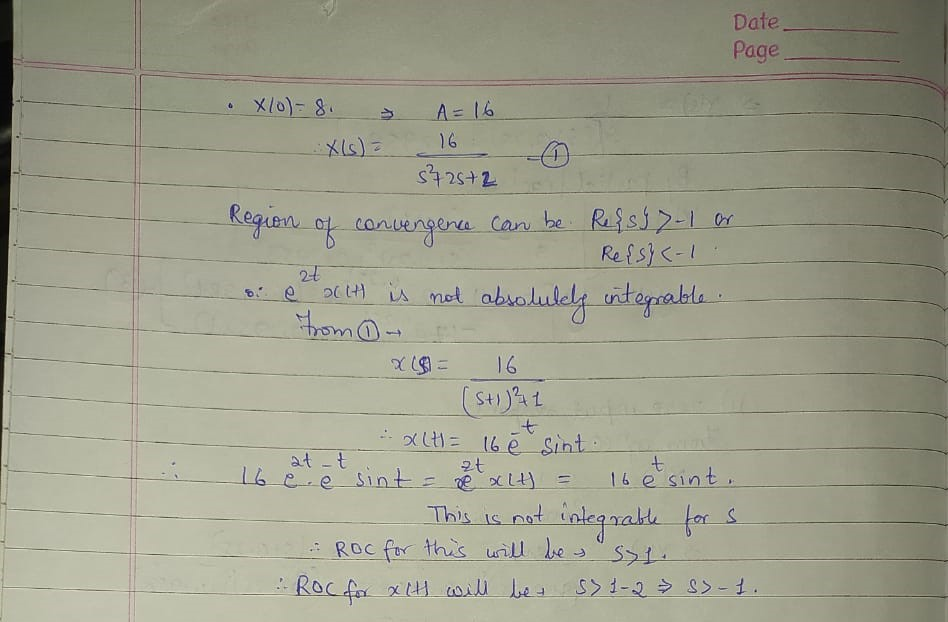

In [50]:
Image(filename='Q10(ii).jpeg',width=400, height=200)

In [51]:
# Finding poles using np.roots

q10_den = [1,2,2]
q10_poles = np.roots(q10_den)

print(f'The poles of given Transfer Function is:')
q10_poles

The poles of given Transfer Function is:


array([-1.+1.j, -1.-1.j])

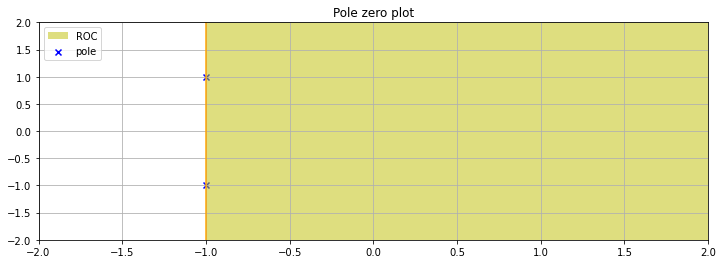

In [52]:
plt.figure(figsize=(12,4))
plt.scatter(q10_poles.real,q10_poles.imag,marker="x",label='pole',c='blue')
plt.title('Pole zero plot')
plt.grid()
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axvline(-1,c='orange')
plt.axvspan(-1,2, color='y', alpha=0.5, lw=0,label='ROC')
plt.legend()
plt.show()